In [1]:
import pandas as pd

# COVID-19

### CSSE data

In [2]:
# Read
csse_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
# Nvm these
csse_ts = csse_ts.drop(['Province/State','Lat','Long'], axis=1)

In [4]:
# Pivot and sort
csse_ts = csse_ts.pivot_table(index='Country/Region').rename_axis(None).sort_index().T

In [5]:
# Name rows
csse_ts.index.name = 'Date_Confirmed'

In [6]:
# set index
csse_ts.reset_index(inplace=True)

In [7]:
# Set date and sort
csse_ts = csse_ts.set_index(pd.DatetimeIndex(csse_ts['Date_Confirmed'])).sort_index()

In [8]:
# Resample for daily mean (if needed)
csse_ts = csse_ts.resample('1D').mean().round()

In [9]:
# Calculate delta (increase) of daily cases
csse_daily = csse_ts.diff().fillna(0).reset_index()

In [10]:
csse_daily

,Date_Confirmed,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2020-04-28,125.0,14.0,132.0,0.0,0.0,0.0,124.0,59.0,3.0,...,364.0,5.0,35.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
98,2020-04-29,111.0,16.0,199.0,0.0,0.0,0.0,158.0,65.0,1.0,...,372.0,5.0,63.0,2.0,0.0,1.0,0.0,5.0,2.0,0.0
99,2020-04-30,232.0,7.0,158.0,2.0,0.0,0.0,143.0,134.0,2.0,...,549.0,13.0,37.0,2.0,0.0,0.0,0.0,0.0,9.0,8.0
100,2020-05-01,164.0,9.0,148.0,0.0,3.0,1.0,104.0,82.0,1.0,...,564.0,5.0,47.0,2.0,0.0,9.0,0.0,1.0,3.0,0.0


### Export

In [11]:
csse_ts.to_csv('time_series/total-world-covid19.csv', index=True) # Total
csse_daily.to_csv('time_series/daily-world_covid19.csv', index=False) # Daily

### Plots

In [12]:
from numpy import *
import math
import matplotlib.pyplot as plt

#### Cumulative
Note exponential growth is expected and not really informative.

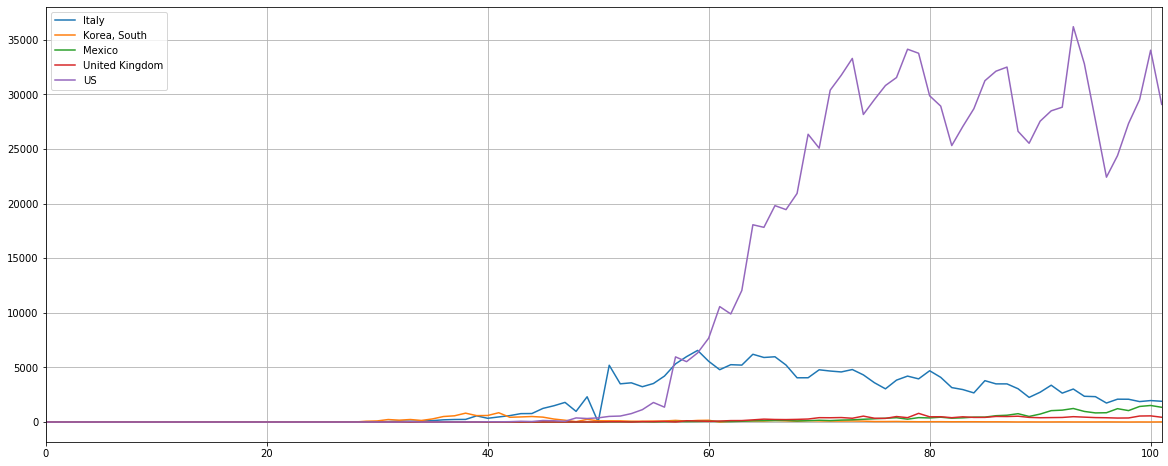

In [16]:
plt.figure(figsize=(20,8))

for state in ['Italy','Korea, South','Mexico','United Kingdom','US']:
    csse_daily[state].fillna(0).plot()

plt.legend()
plt.grid(True)
plt.show()

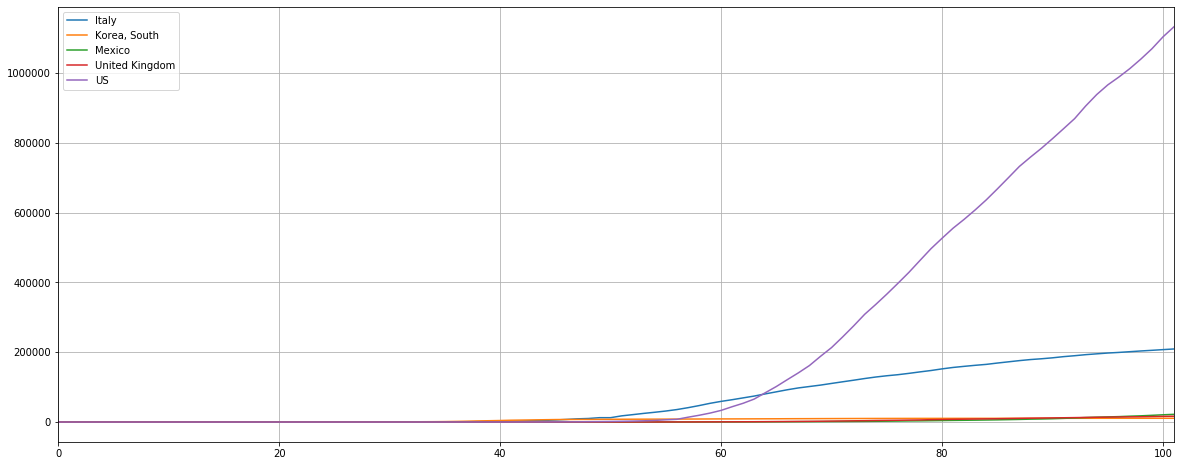

In [17]:
plt.figure(figsize=(20,8))

for state in ['Italy','Korea, South','Mexico','United Kingdom','US']:
    csse_daily[state].fillna(0).cumsum().plot()

plt.legend()
plt.grid(True)
plt.show()

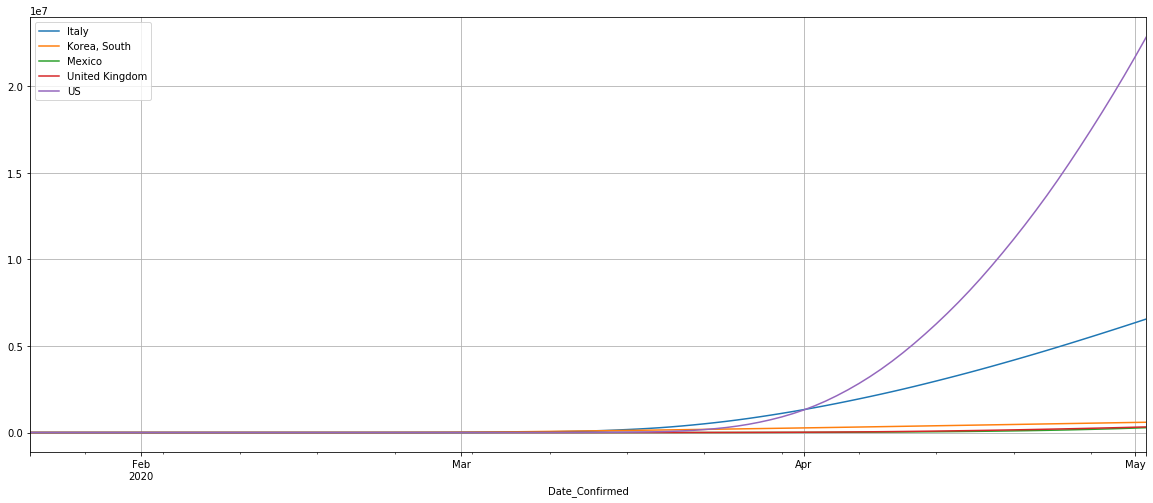

In [18]:
plt.figure(figsize=(20,8))

for state in ['Italy','Korea, South','Mexico','United Kingdom','US']:
    csse_ts[state].fillna(0).cumsum().plot()

plt.legend()
plt.grid(True)
plt.show()

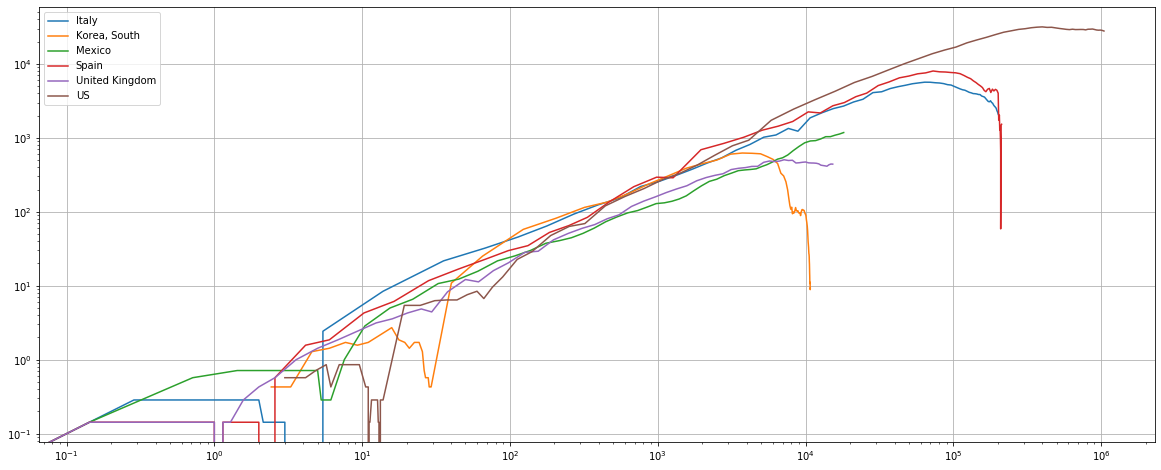

In [19]:
plt.figure(figsize=(20,8))

for state in ['Italy','Korea, South','Mexico','Spain','United Kingdom','US']:
    plt.plot(list(csse_ts[state].dropna().rolling(window=7).mean()), list(csse_daily[state].dropna().rolling(window=7).mean()), label=state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()